In [1]:
import multiprocessing
import numpy as np
import xarray as xr
import os
import math
import pandas as pd
import netCDF4 as nc
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

In [28]:
data1 = pd.read_csv('./Result1_intro/RECO_seasonal_change_normalized_north_nighttime.csv')
igbp_values = data1['igbp']
unique_igbp = np.unique(data1['igbp'].values)
igbp = []
RECO_nor = np.zeros((11, 12))
RECO_nor[:] = np.nan
igbp_list = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']

for i in range(11):
    if np.sum(igbp_values==igbp_list[i]) >=10:
        igbp.append(igbp_list[i])
        for j in range(12):
            RECO_nor[i][j] = np.nanmean(data1[str(j+1)][(igbp_values==igbp_list[i])])
month = []
for i in range(12):
    month.append(i+1)

RECO_type1 = []
for i in range(12):
    RECO_type1.append( np.nanmean(RECO_nor[:,i]) )

C:\Users\111\AppData\Local\Temp\ipykernel_10648\851835326.py:13: RuntimeWarning: Mean of empty slice
  RECO_nor[i][j] = np.nanmean(data1[str(j+1)][(igbp_values==igbp_list[i])])


In [29]:
path1 = './Seasonal_variation_igbp.csv'
data1 = pd.read_csv(path1)
m,n = data1.shape
ratio_2 = []
for i in range(m):
    ratioi = data1['delt_ref'][i]/data1['delt_mean'][i]
    ratio_2.append(ratioi)

In [4]:
len(ratio_2)

1647

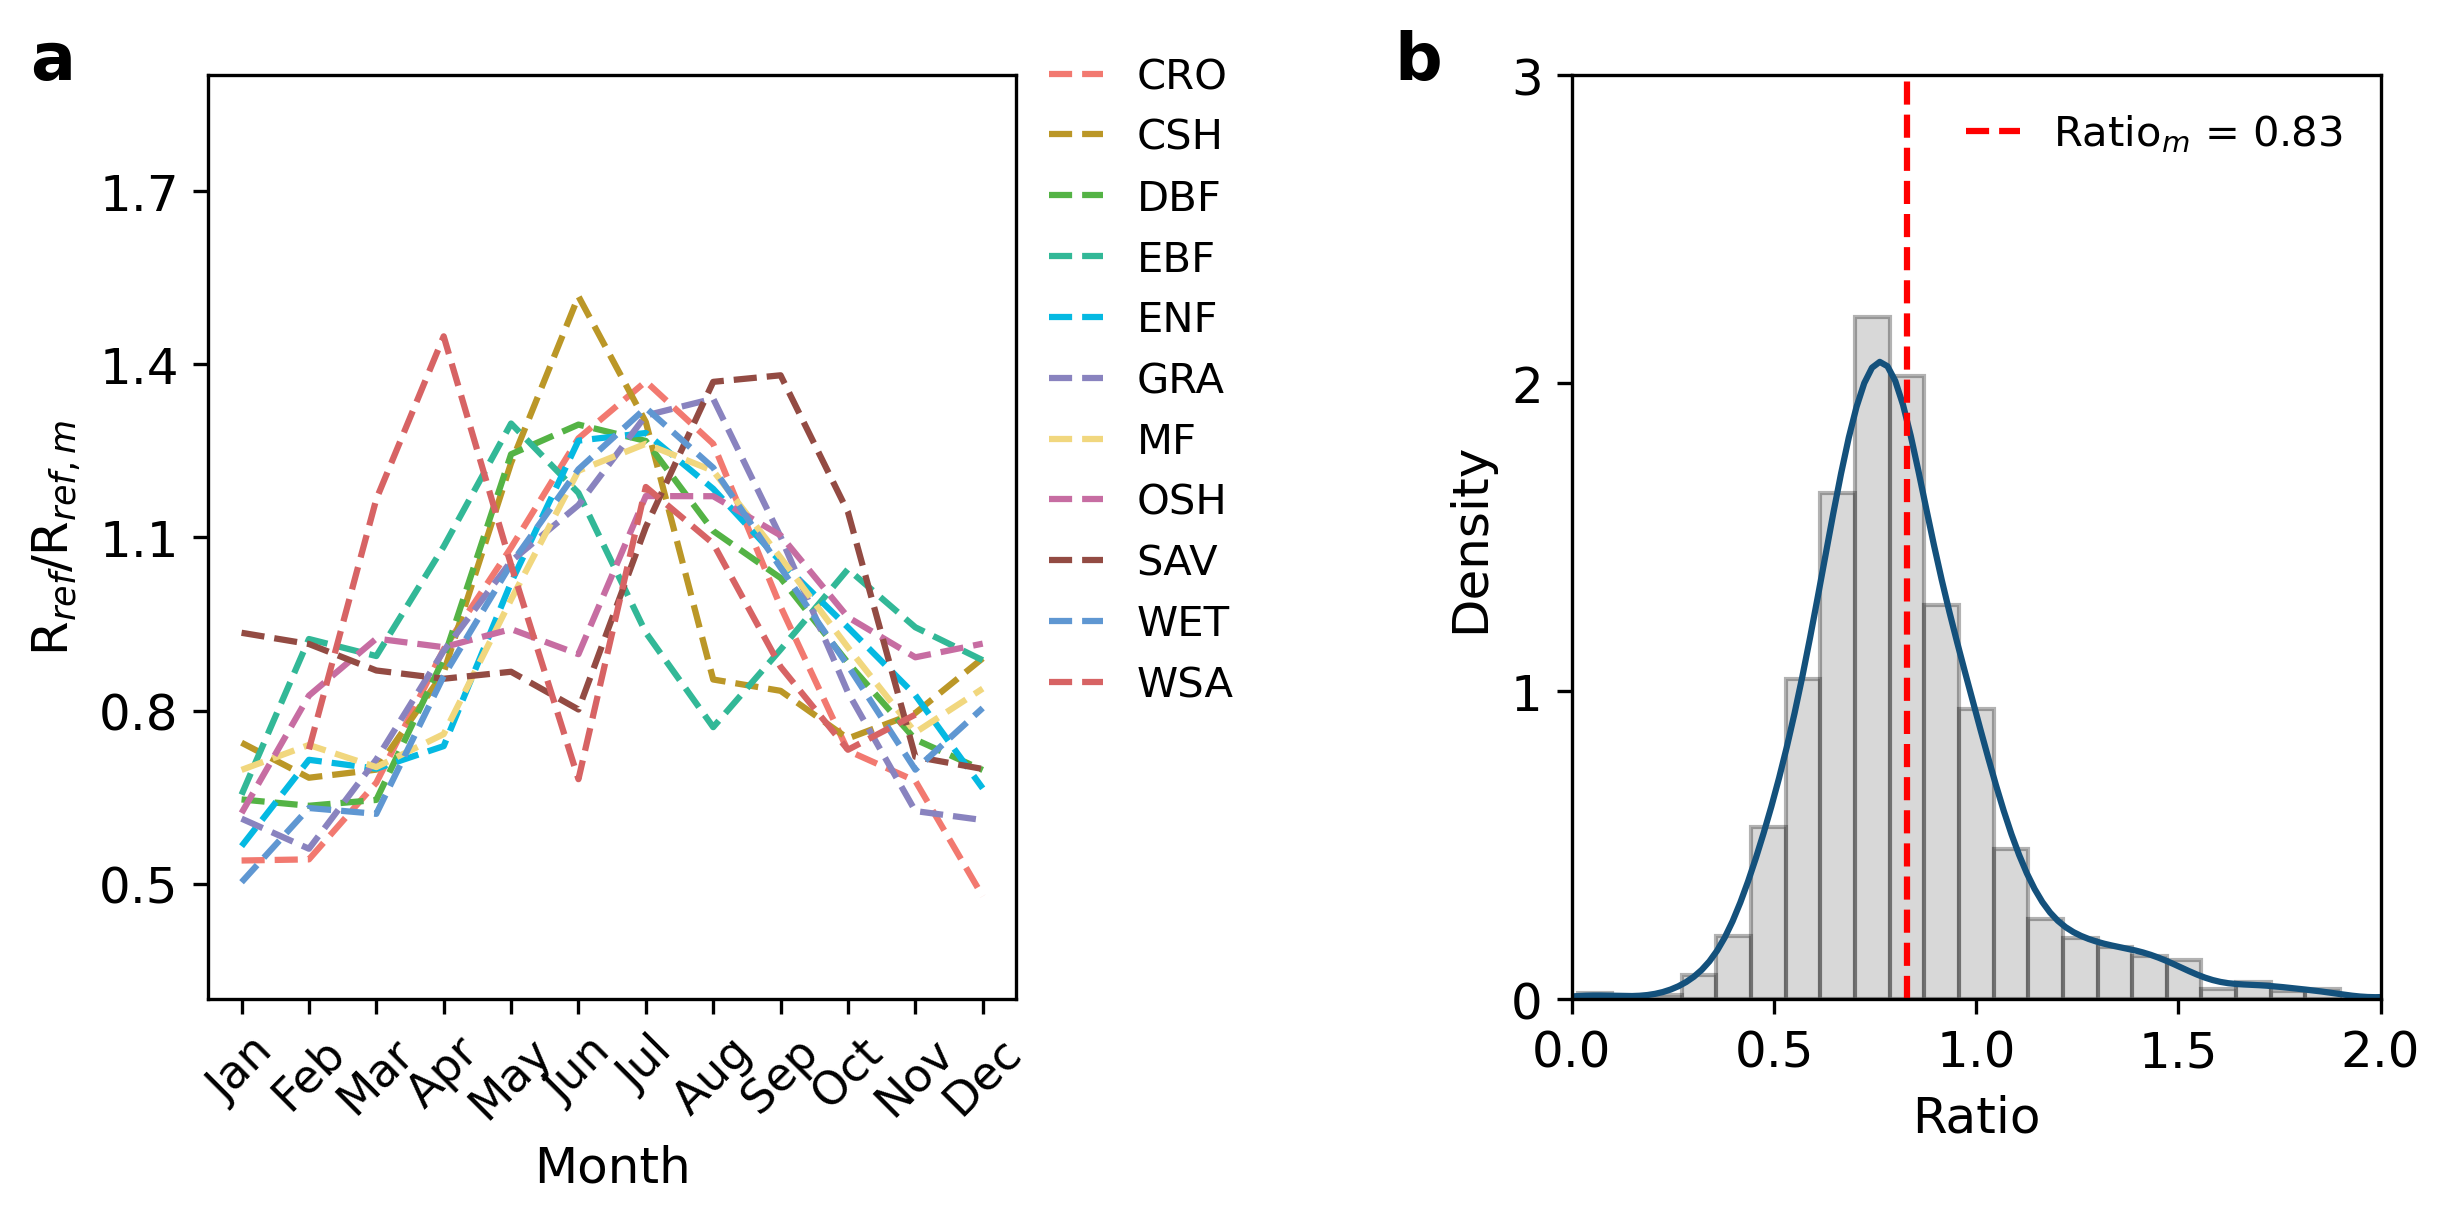

In [31]:
fig = plt.figure(figsize=(14, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

gs = GridSpec(nrows=1, ncols=4, width_ratios=[1,0.01,1,1]) #, height_ratios=[1,1])


#########################################################################################################################################
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = fig.add_subplot(gs[0,0])

colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2', '#D76364']

for i in range(11):
    ax.plot(month, RECO_nor[i], ls='--', linewidth=1.5, alpha=1, label=igbp[i], color = colors[i])

ax.set_xlabel('Month',size = 12)
ax.set_ylabel('R$_{ref}$/R$_{ref,m}$',size = 12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(month, month_label)

ax.set_xlim(0.5,12.5);
ax.set_ylim(0.3,1.9);
ax.set_xticks(np.linspace(1,12,12))
ax.set_yticks(np.linspace(0.5,1.7,5))

ax.legend(fontsize=10, edgecolor='white', loc=[1.02,0.3], frameon=True, handlelength = 1.3)
ax.text(-0.22, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

#########################################################################################################################################
ax = fig.add_subplot(gs[0,2])

sns.kdeplot(ratio_2, color='#14517C')
ax.hist(ratio_2, bins=40, density=True, edgecolor='black', facecolor='gray', alpha=0.3)

ax.set_xlabel('Ratio',size = 12)
ax.set_ylabel('Density',size = 12)
ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

ax.set_xlim(0,2);
ax.set_ylim(0,3);
ax.set_xticks(np.linspace(0,2,5))
ax.set_yticks(np.linspace(0,3,4))

ax.text(-0.22, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax.axvline(x=np.mean(ratio_2), color='red', linestyle='--', label='Ratio$_{m}$ = 0.83')
ax.legend(fontsize=10, edgecolor='white', loc='upper right', frameon=True, handlelength = 1.3)




In [8]:
np.mean(ratio_2)

0.8296119634989988

In [33]:
data1 = pd.read_csv('./Result1_intro/RECO_seasonal_change_normalized_south_nighttime.csv')
igbp_values = data1['igbp']
unique_igbp = np.unique(data1['igbp'].values)
igbp = []
RECO_nor = np.zeros((11, 12))
RECO_nor[:] = np.nan
igbp_list = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']

a = 0
for i in range(11):
    if np.sum(igbp_values==igbp_list[i]) >=3:
        igbp.append(igbp_list[i])
        for j in range(12):
            RECO_nor[a][j] = np.nanmean(data1[str(j+1)][(igbp_values==igbp_list[i])])
        a+=1
    
month = []
for i in range(12):
    month.append(i+1)

RECO_type1 = []
for i in range(12):
    RECO_type1.append( np.nanmean(RECO_nor[:,i]) )

Text(-0.22, 1.05, ' ')

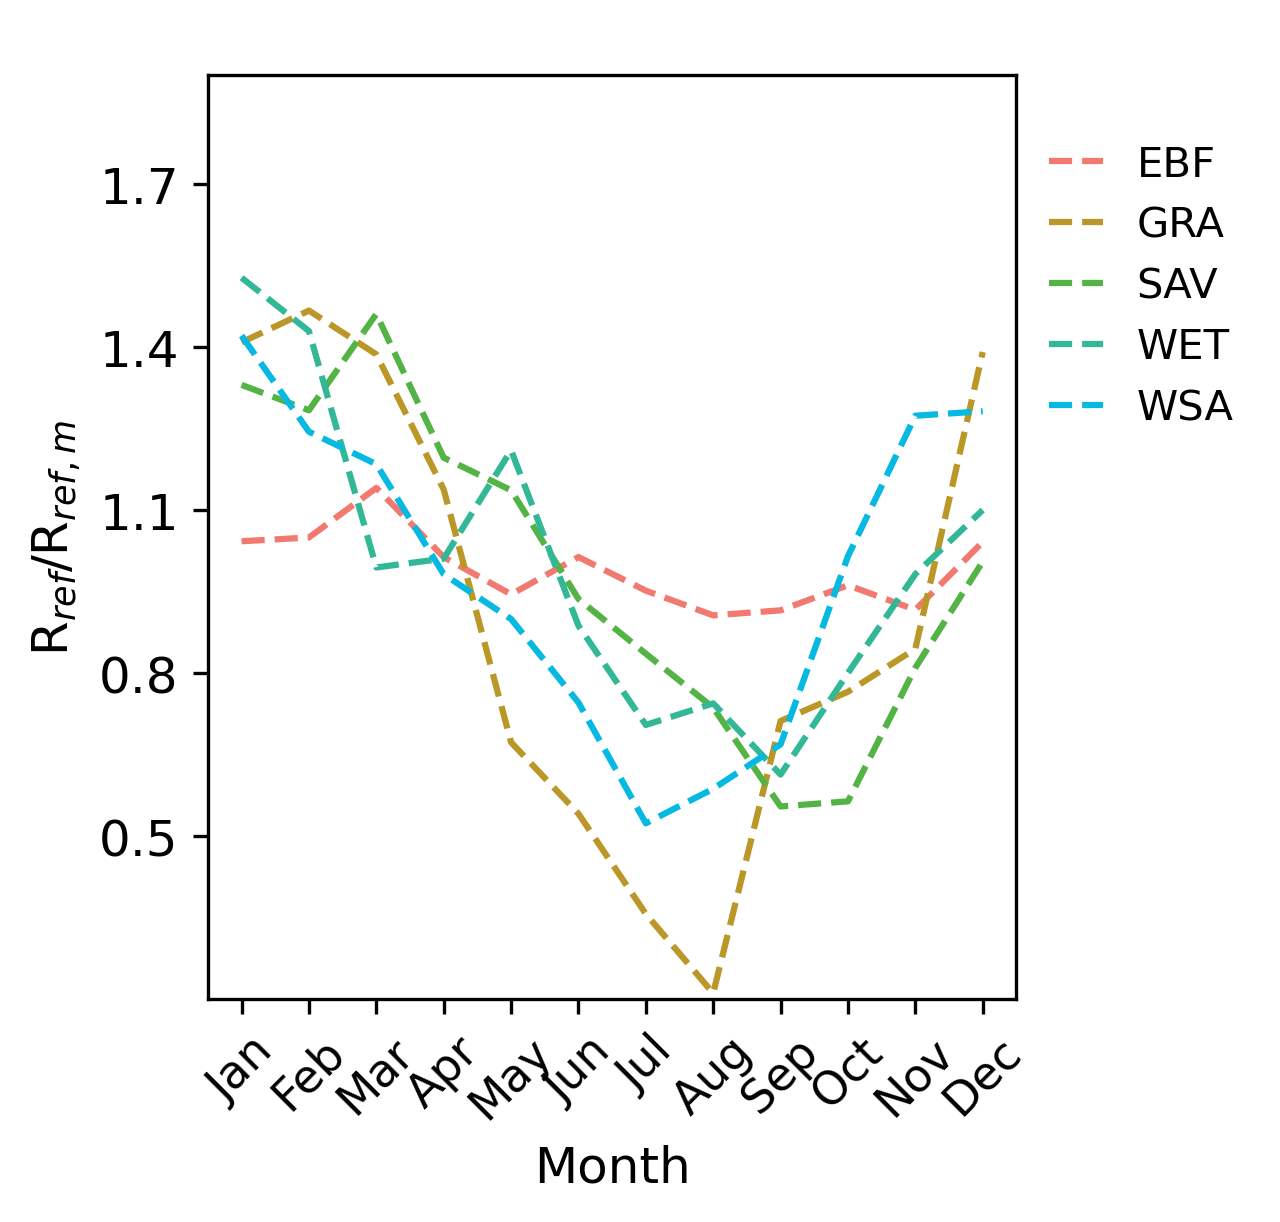

In [34]:
fig = plt.figure(figsize=(14, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

gs = GridSpec(nrows=1, ncols=4, width_ratios=[1,0.01,1,1]) #, height_ratios=[1,1])


#########################################################################################################################################
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = fig.add_subplot(gs[0,0])

colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2', '#D76364']

for i in range(5):
    ax.plot(month, RECO_nor[i], ls='--', linewidth=1.5, alpha=1, label=igbp[i], color = colors[i])

ax.set_xlabel('Month',size = 12)
ax.set_ylabel('R$_{ref}$/R$_{ref,m}$',size = 12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(month, month_label)

ax.set_xlim(0.5,12.5);
ax.set_ylim(0.2,1.9);
ax.set_xticks(np.linspace(1,12,12))
ax.set_yticks(np.linspace(0.5,1.7,5))

ax.legend(fontsize=10, edgecolor='white', loc=[1.02,0.6], frameon=True, handlelength = 1.3)
ax.text(-0.22, 1.05, " ", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

In [14]:
RECO_nor.shape

(11, 12)

In [15]:
len(igbp)

5

In [7]:
data1 = pd.read_csv('./Seasonal_variation_climate.csv')
m,n = data1.shape
climate0 = ['A', 'B', 'C', 'D', 'E']
climate = ['Tropical', 'Arid', 'Temperate', 'Continental', 'Ploar']
ratio_31 = []
climate_3 = []

for i in range(len(climate0)):
    ratioi = []
    for j in range(m):
        if data1['climate'][j][0] == climate0[i]:
            ratioj = data1['delt_ref'][j]/data1['delt_mean'][j]
            ratioi.append(ratioj)
    if len(ratioi) >= 5:
        climate_3.append(climate[i])
        ratio_31.append(ratioi)
        
        
###########################################################################################      
data2 = pd.read_csv('./Seasonal_variation_igbp.csv')
m,n = data2.shape
igbp = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']
igbp_3 = []
ratio_32 = []
for i in range(len(igbp)):
    ratioi = []
    for j in range(m):
        if data2['igbp'][j] == igbp[i]:
            ratioj = data2['delt_ref'][j]/data2['delt_mean'][j]
            ratioi.append(ratioj)
    if len(ratioi) >= 5:
        igbp_3.append(igbp[i])
        ratio_32.append(ratioi)

Text(-0.22, 1.05, 'b')

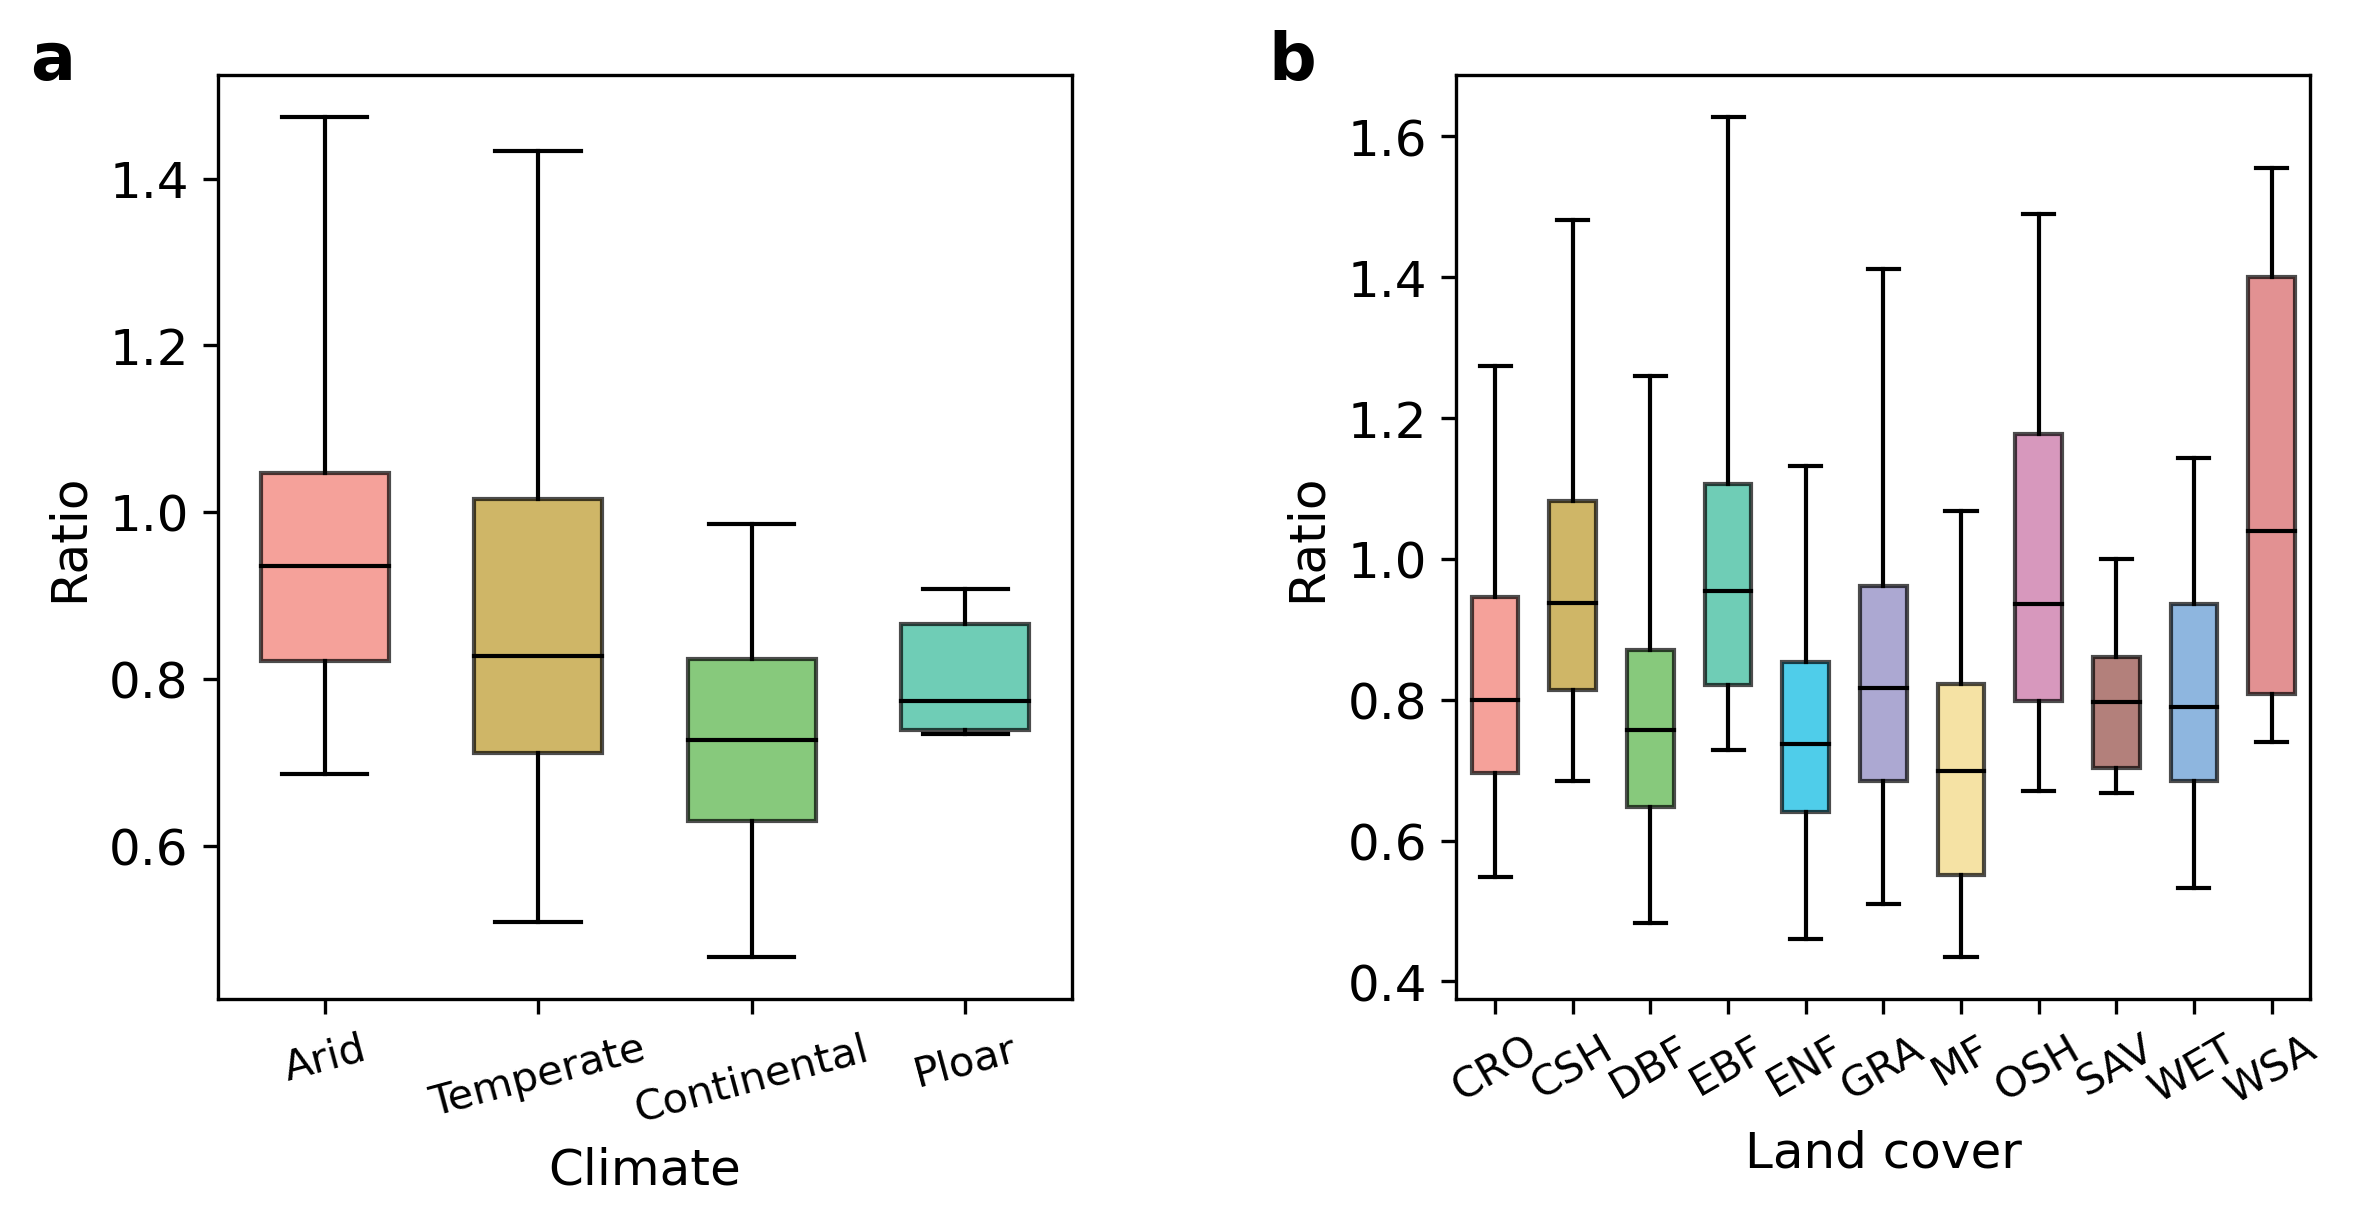

In [8]:
fig = plt.figure(figsize=(9, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

##########################################################################################################################
colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2', '#D76364']

ax = fig.add_subplot(1,2,1)

boxplot = ax.boxplot(ratio_31,
                     whis = (5,95),
                     vert=True,
                     patch_artist=True,
                     showfliers = False,
                     showmeans =False,
                     medianprops = {'color':'black'},
                     widths=0.6,
                     capwidths=0.4,
                     labels = climate_3,
                     zorder=10
                    )

box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1   

ax.tick_params(axis='x', labelsize=10, rotation=15)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Climate',size = 12)
ax.set_ylabel('Ratio',size = 12)

ax.text(-0.22, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')



##############################################################################################
colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2', '#D76364']

ax = fig.add_subplot(1,2,2)

boxplot = ax.boxplot(ratio_32,
                     whis = (5,95),
                     vert=True,
                     patch_artist=True,
                     showfliers = False,
                     showmeans =False,
                     medianprops = {'color':'black'},
                     widths=0.6,
                     capwidths=0.4,
                     labels = igbp_3,
                     zorder=10
                    )

box_alpha = 0.7
i=0
for patch in boxplot['boxes']:
    patch.set_facecolor(colors[i])
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(1)
    i+=1   

ax.tick_params(axis='x', labelsize=10, rotation=30)
ax.tick_params(axis='y', labelsize=12)
ax.set_xlabel('Land cover',size = 12)
ax.set_ylabel('Ratio',size = 12)

ax.text(-0.22, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

In [6]:
for i in range(len(ratio_32)):
    print(np.mean(ratio_32[i]))

0.840841774126061
0.9930957477012683
0.8033684498163443
1.0327838235254747
0.7586389472603655
0.8574450164367566
0.7227757487178764
1.010196247362015
0.7950565875650315
0.8233769018873937
1.1374834713836681


In [2]:
path1 = 'D:/Data/Fluxnet/AllHourlyData_year3/FLX_FR-Fon_FLUXNET2015_FULLSET_HH_2005-2014_1-4.csv'

data1 = pd.read_csv(path1)
month1 = np.round(data1['TIMESTAMP_START']/1000000).astype(int)%100

m,n = data1.shape

normalized_T_all = []
ln_R_all = []

days1 = 10
days2 = 6

T_15 = []
ln_R_15 = []

for i in range(int(m/48/days1)-29, int(m/48/days1)-16):
    #print(month1[i*days1*48])
    
    Ti_0 = data1['TA_F_MDS'].values[i*days1*48 : i*days1*48+days2*48]
    RECOi_0 = data1['RECO_NT_VUT_REF'].values[i*days1*48 : i*days1*48+days2*48]
    T_QCi_0 = data1['VPD_F_MDS_QC'].values[i*days1*48 : i*days1*48+days2*48]
    
    Ti_1 = Ti_0[(Ti_0!=-9999)  & (RECOi_0!=-9999) & (RECOi_0>0.01) & (T_QCi_0==0)]
    RECOi_1 = RECOi_0[(Ti_0!=-9999) & (RECOi_0!=-9999) & (RECOi_0>0.01) & (T_QCi_0==0)]
    
    
    RECOi_2 = RECOi_0[(Ti_0!=-9999) & (RECOi_0!=-9999) & (RECOi_0>0.01) & (T_QCi_0==0) & (Ti_0>=14.5) & (Ti_0<15.5)]
    
    
    Normal_Ti_1 = (Ti_1-10)/10
    ln_RECOi_1 = np.log(RECOi_1)
        
    ln_RECOi_2 = np.log(RECOi_2)
    
    normalized_T_all.append(Normal_Ti_1.tolist())
    ln_R_all.append(ln_RECOi_1.tolist())
    
    T_15.append(0.5)
    ln_R_15.append(np.mean(ln_RECOi_2))
    

In [3]:
data1 = pd.read_csv('./Result1_intro/RECO_seasonal_change_normalized_north_nighttime.csv')
igbp_values = data1['igbp']
unique_igbp = np.unique(data1['igbp'].values)
igbp = []
RECO_nor = np.zeros((11, 12))
RECO_nor[:] = np.nan
igbp_list = ['CRO', 'CSH', 'DBF', 'EBF', 'ENF', 'GRA', 'MF', 'OSH', 'SAV', 'WET', 'WSA']

for i in range(11):
    if np.sum(igbp_values==igbp_list[i]) >=10:
        igbp.append(igbp_list[i])
        for j in range(12):
            RECO_nor[i][j] = np.nanmean(data1[str(j+1)][(igbp_values==igbp_list[i])])
month = []
for i in range(12):
    month.append(i+1)

RECO_type1 = []
for i in range(12):
    RECO_type1.append( np.nanmean(RECO_nor[:,i]) )

C:\Users\111\AppData\Local\Temp\ipykernel_14144\851835326.py:13: RuntimeWarning: Mean of empty slice
  RECO_nor[i][j] = np.nanmean(data1[str(j+1)][(igbp_values==igbp_list[i])])


In [4]:
ln_R_start_list = []
for i in range(len(normalized_T_all[0])):
    if normalized_T_all[0][i]>=0.19 and normalized_T_all[0][i]<=0.21:
        ln_R_start_list.append(ln_R_all[0][i])
ln_R_start = np.mean(ln_R_start_list)


ln_R_middle_list = []
for i in range(len(normalized_T_all[8])):
    if normalized_T_all[8][i]>=0.19 and normalized_T_all[8][i]<=0.21:
        ln_R_middle_list.append(ln_R_all[8][i])
ln_R_middle = np.mean(ln_R_middle_list)


ln_R_end_list = []
for i in range(len(normalized_T_all[8])):
    if normalized_T_all[8][i]>=1.19 and normalized_T_all[8][i]<=1.21:
        ln_R_end_list.append(ln_R_all[8][i])
ln_R_end = np.mean(ln_R_end_list)

Text(-0.22, 1.05, 'b')

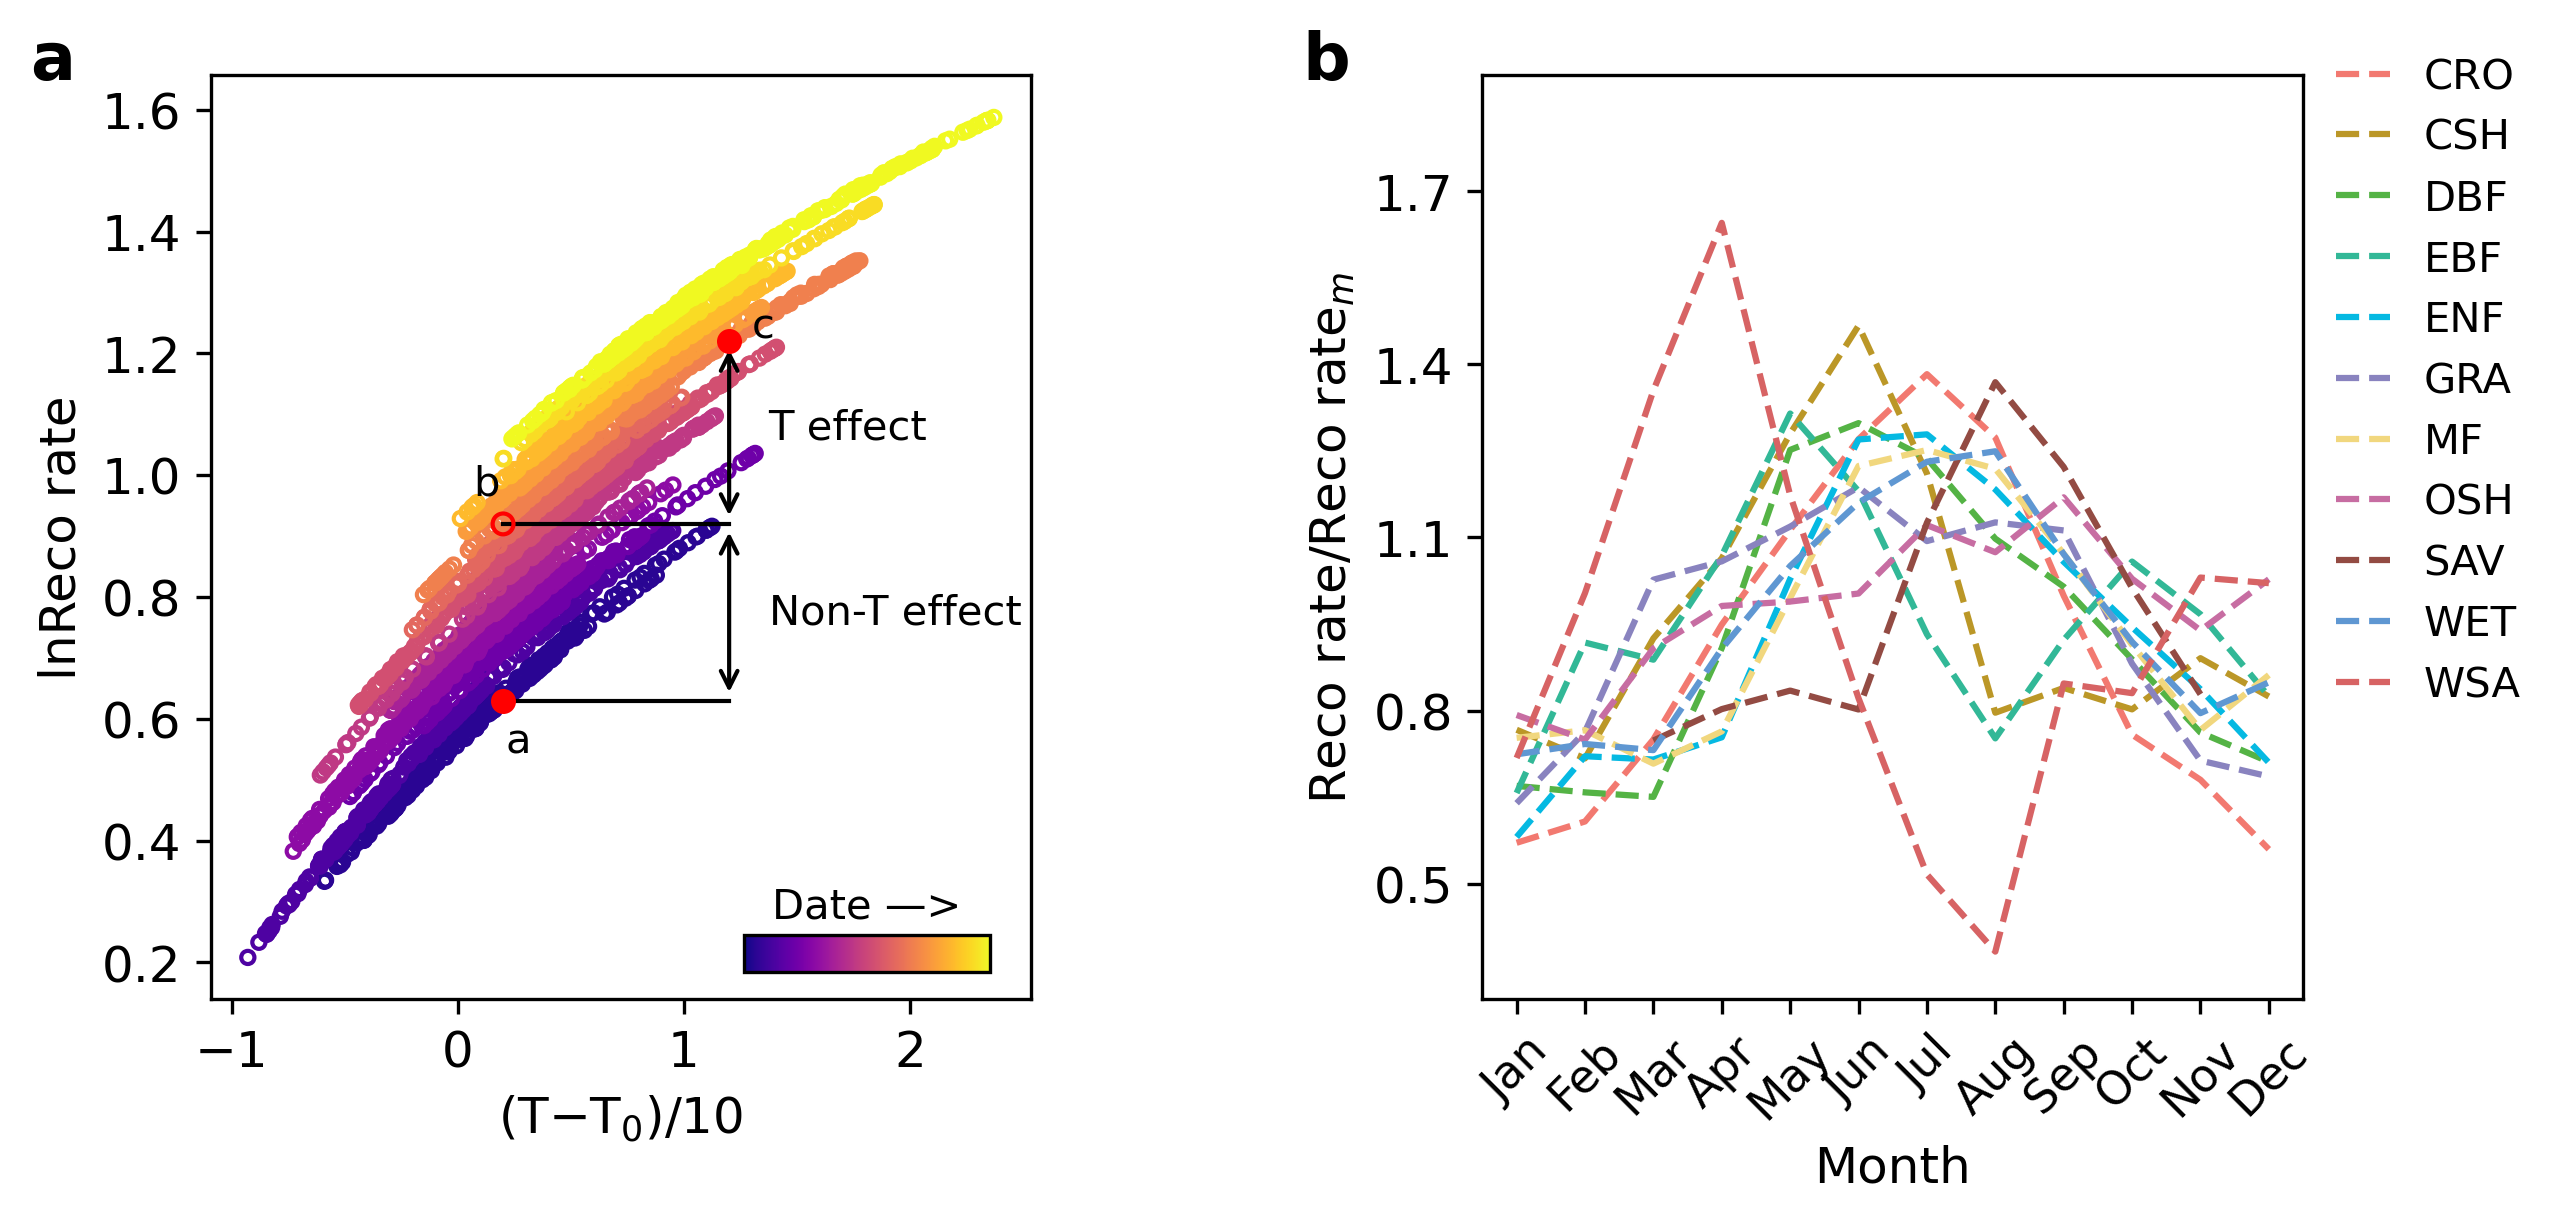

In [7]:
fig = plt.figure(figsize=(9, 4),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.55, hspace=0.4)
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 0.8

ax = fig.add_subplot(1,2,1)
ax_pos = ax.get_position()
x1 = ax_pos.x0
y1 = ax_pos.y0
width1 = ax_pos.width
height1 = ax_pos.height
cax = fig.add_axes([x1+0.65*width1, y1+0.03*height1, 0.3*width1, 0.04*height1])  #四个参数分别是colorbar的左、下、宽、长 
cbar = mpl.colorbar.ColorbarBase(cax, cmap='plasma',#颜色
                                  norm=mpl.colors.Normalize(-1,1),#设置颜色条最大最小值
                                  ticks=list(np.linspace(-1, 1, 5)),#自定义各段的记号
                                  orientation='horizontal', #方向垂直
                                  label = 'Date —>');
cbar.ax.xaxis.set_label_position('top') # 移动colorbar的标签到顶部
cbar.ax.tick_params(direction='in', bottom = False, top = True, labelbottom = False, labeltop = True, length=0, colors='k') # 设置标签样式
cbar.ax.tick_params(labelsize=10)
cbar.set_ticks([])

sm = plt.cm.ScalarMappable(norm=cbar.norm, cmap=cbar.cmap)

colors = []
for i in range(len(normalized_T_all)):
    value = -0.9+i*0.16
    color = sm.to_rgba(value)
    colors.append(color)

for i in range(len(normalized_T_all)):
    ax.scatter(normalized_T_all[i], ln_R_all[i], s=10, marker='o', color=colors[i], facecolor='none')

ax.set_xlabel('(T\u2212T$_{0}$)/10',size = 12)
ax.set_ylabel('lnReco rate',size = 12)

start = -0.2
end = 1.2

# 绘制垂直的阴影
#ax.axvspan(start, end, alpha=0.2, color='tab:gray', edgecolor='none', zorder=0 )


ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.text(-0.22, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')

ax.scatter([0.2, 1.2], [0.63, 1.22], color='red', s=25, zorder=5)
ax.scatter([0.2], [0.92], color='red', facecolor='none', s=25, zorder=5)

ax.plot([0.2, 1.2], [0.63, 0.63], linewidth=1, color='black')
ax.plot([0.2, 1.2], [0.92, 0.92], linewidth=1, color='black')


ax.annotate("", xy=(1.2, 0.92), xytext=(1.2, 0.63), arrowprops=dict(arrowstyle="<->"))
ax.annotate("", xy=(1.2, 1.22), xytext=(1.2, 0.92), arrowprops=dict(arrowstyle="<->"))
ax.text(0.68, 0.64, "T effect", transform=ax.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')
ax.text(0.68, 0.44, "Non-T effect", transform=ax.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')
ax.text(0.36, 0.3, "a", transform=ax.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')
ax.text(0.32, 0.58, "b", transform=ax.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')

ax.text(0.66, 0.75, "c", transform=ax.transAxes,
         fontsize=10, fontweight='normal', va='top', ha='left')


#########################################################################################################################################
month_label = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

ax = fig.add_subplot(1,2,2)

colors = ['#F27970', '#BB9727', '#54B345', '#32B897', '#05B9E2', '#8983BF', '#F1D77E', '#C76DA2', '#934B43','#5F97D2', '#D76364']

for i in range(11):
    ax.plot(month, RECO_nor[i], ls='--', linewidth=1.5, alpha=1, label=igbp[i], color = colors[i])

ax.set_xlabel('Month',size = 12)
ax.set_ylabel('Reco rate/Reco rate$_{m}$',size = 12)
ax.tick_params(axis='x', labelsize=11, rotation=45)
ax.tick_params(axis='y', labelsize=12)

plt.xticks(month, month_label)

ax.set_xlim(0.5,12.5);
ax.set_ylim(0.3,1.9);
ax.set_xticks(np.linspace(1,12,12))
ax.set_yticks(np.linspace(0.5,1.7,5))

ax.legend(fontsize=10, edgecolor='white', loc=[1.02,0.3], frameon=True, handlelength = 1.3)
ax.text(-0.22, 1.05, "b", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')



In [ ]:
fig = plt.figure(figsize=(12, 6),dpi = 100)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=-0.02, hspace=0.3);
plt.rcParams['axes.unicode_minus'] = True
plt.rcParams['axes.linewidth'] = 1


land_50m = cfeature.NaturalEarthFeature('physical', 'coastline', '110m',
                                        edgecolor='black', facecolor='none',linewidth=1)

ax1 = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax1.add_feature(land_50m)